In [4]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from config import j

In [5]:
df = pd.read_csv(j('results/256/performance.csv'))
df

,timestep,latent-rmse_1,rmse_1,latent-mae_1,mae_1,latent%_1,%_1,time_1,latent-rmse_2,rmse_2,...,latent%_8,%_8,time_8,latent-rmse_9,rmse_9,latent-mae_9,mae_9,latent%_9,%_9,time_9
0,5695000,0.002700,0.137127,0.001503,0.106561,0.466280,237300.638455,5576.132059,0.002449,0.137143,...,0.428517,236900.499615,124.449015,0.003834,0.136991,0.001505,0.106424,0.676014,237006.329027,108.696938
1,5700000,0.001339,0.137134,0.000570,0.106559,0.214819,237392.827966,114.653111,0.001268,0.137087,...,0.541215,236982.778350,135.217428,0.004248,0.137038,0.000973,0.106517,0.747704,237596.197739,211.580515
2,5705000,0.000706,0.137082,0.000708,0.106526,0.106089,237083.874244,205.201387,0.000671,0.137154,...,0.672599,237583.632068,206.470490,0.003491,0.137015,0.000549,0.106471,0.613190,237248.235923,133.605003
3,5710000,0.000814,0.137149,0.000669,0.106549,0.123186,236958.003288,125.027418,0.000655,0.137165,...,0.493114,237228.779295,209.222794,0.002765,0.137060,0.000601,0.106514,0.479989,237209.976904,145.521641
4,5715000,0.001008,0.137162,0.000645,0.106592,0.158336,236966.461910,208.031893,0.001566,0.137136,...,0.486891,237211.160256,130.892992,0.002974,0.137009,0.000851,0.106438,0.521044,237029.103247,133.177996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,10280000,0.001103,0.137228,0.000466,0.106619,0.170183,237092.074047,125.489712,0.001220,0.137080,...,0.507771,237447.658247,128.678322,0.000862,0.137214,0.000838,0.106613,0.127523,236795.133683,147.699833
918,10285000,0.001334,0.137079,0.000802,0.106486,0.207497,236515.960009,208.345652,0.000642,0.136985,...,0.157763,236801.301765,130.082846,0.001254,0.137252,0.000720,0.106610,0.204904,236799.293332,131.518602
919,10290000,0.000974,0.136988,0.001264,0.106410,0.144370,236892.833008,213.798046,0.002942,0.137123,...,0.378430,236832.407125,143.299341,0.002925,0.137122,0.000706,0.106560,0.510576,236892.548674,142.662287
920,10295000,0.000995,0.137106,0.001309,0.106546,0.151761,237752.394027,144.732475,0.000807,0.137215,...,0.327094,236859.318859,134.727001,0.003046,0.137351,0.000627,0.106727,0.528475,237628.403638,213.830471


In [6]:
ls = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'indigo', 'purple', 'violet']

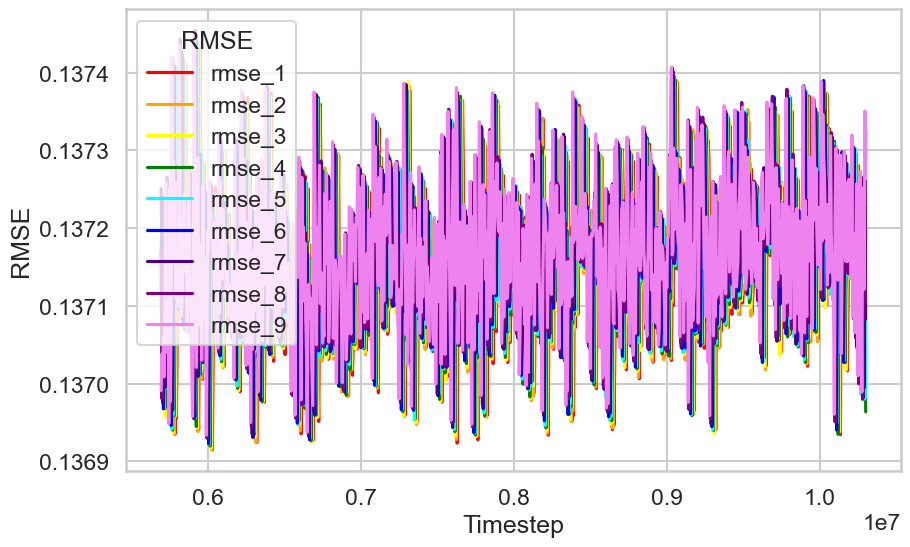

In [23]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'rmse_{i + 1}', label=f'rmse_{i + 1}', color=ls[i])


plt.ylabel('RMSE')
plt.xlabel('Timestep')
# Show the plot
plt.legend(title='RMSE')
plt.show()

Text(0, 0.5, 'Average RMSE')

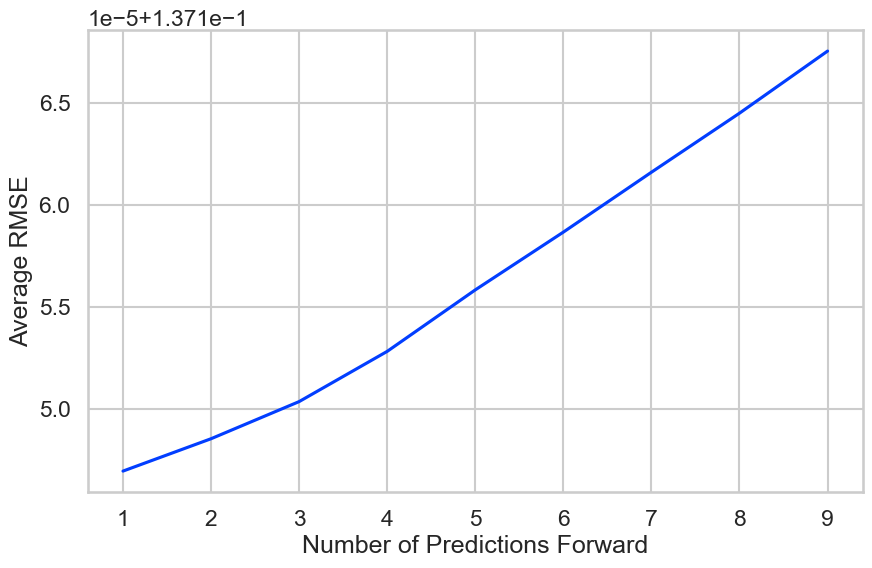

In [18]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('rmse_')])

sns.lineplot(x=x, y=y)

plt.xlabel('Number of Predictions Forward')
plt.ylabel('Average RMSE')

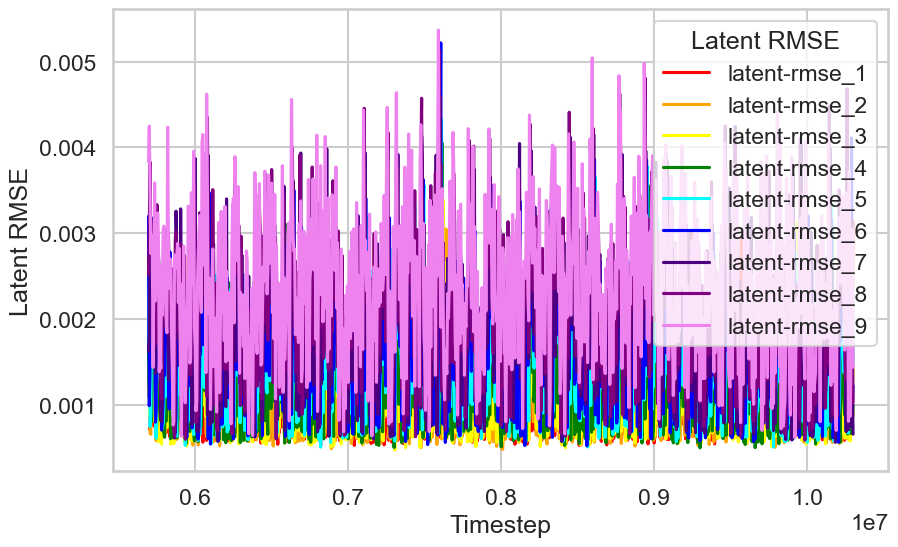

In [30]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'latent-rmse_{i + 1}', label=f'latent-rmse_{i + 1}', color=ls[i])


plt.ylabel('Latent RMSE')
plt.xlabel('Timestep')
# Show the plot
plt.legend(title='Latent RMSE')
plt.show()

Text(0, 0.5, 'Average Latent RMSE')

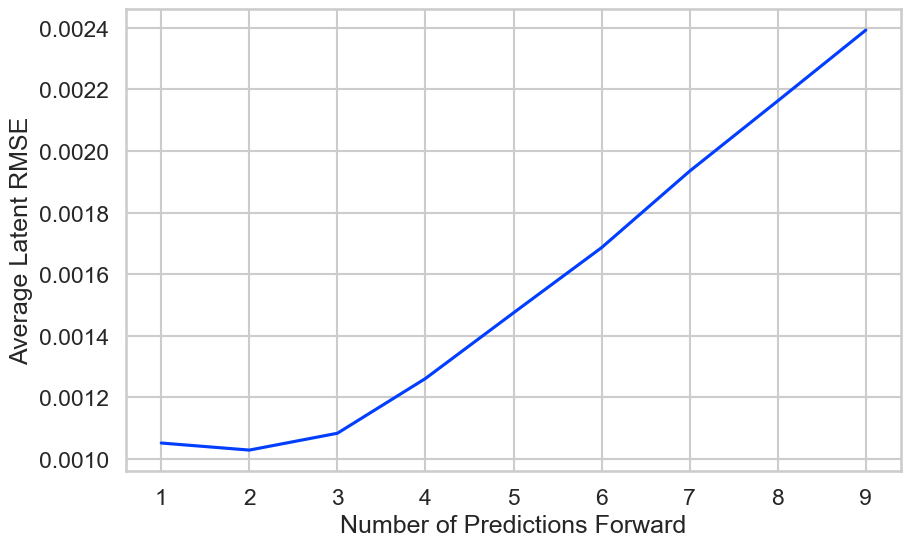

In [19]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('latent-rmse_')])

sns.lineplot(x=x, y=y)

plt.xlabel('Number of Predictions Forward')
plt.ylabel('Average Latent RMSE')

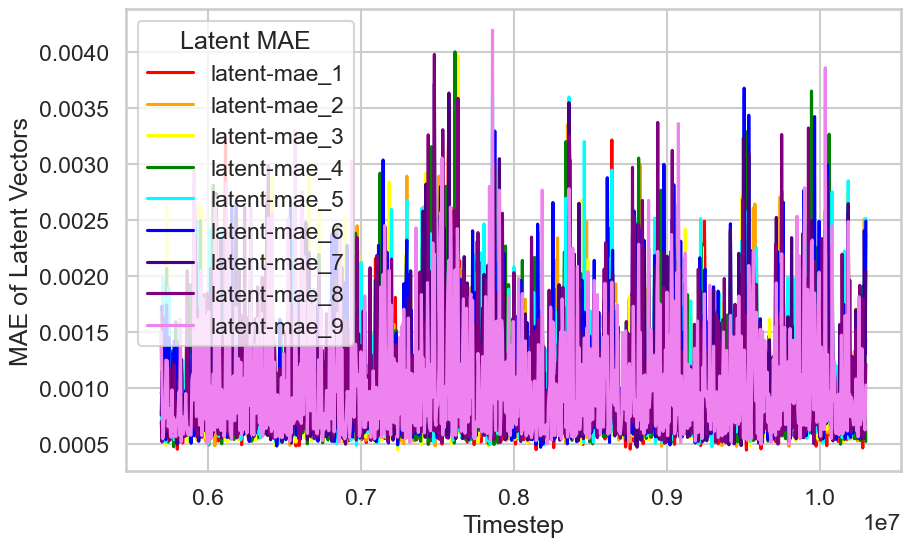

In [31]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'latent-mae_{i + 1}', label=f'latent-mae_{i + 1}', color=ls[i])

plt.ylabel('MAE of Latent Vectors')
plt.xlabel('Timestep')
# Show the plot
plt.legend(title='Latent MAE')
plt.show()

Text(0, 0.5, 'Average Latent MAE')

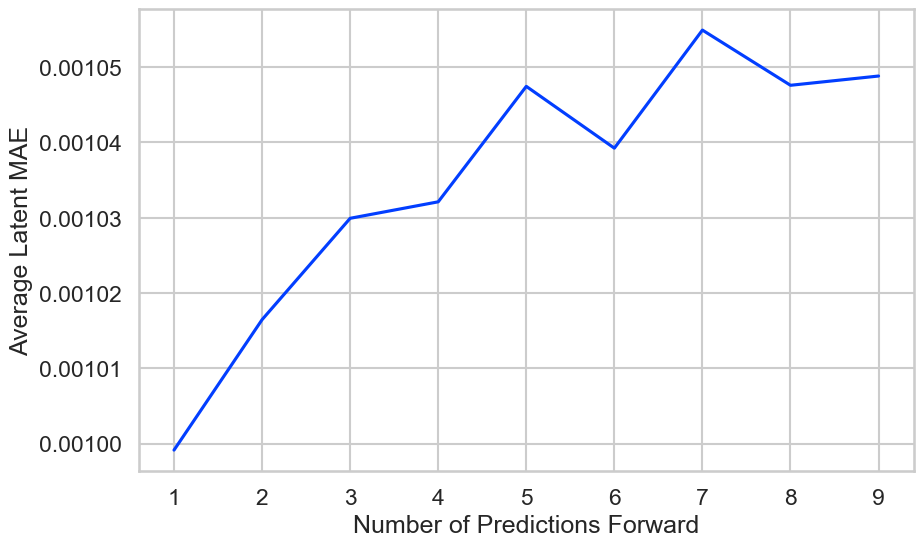

In [20]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('latent-mae_')])

sns.lineplot(x=x, y=y)

plt.xlabel('Number of Predictions Forward')
plt.ylabel('Average Latent MAE')

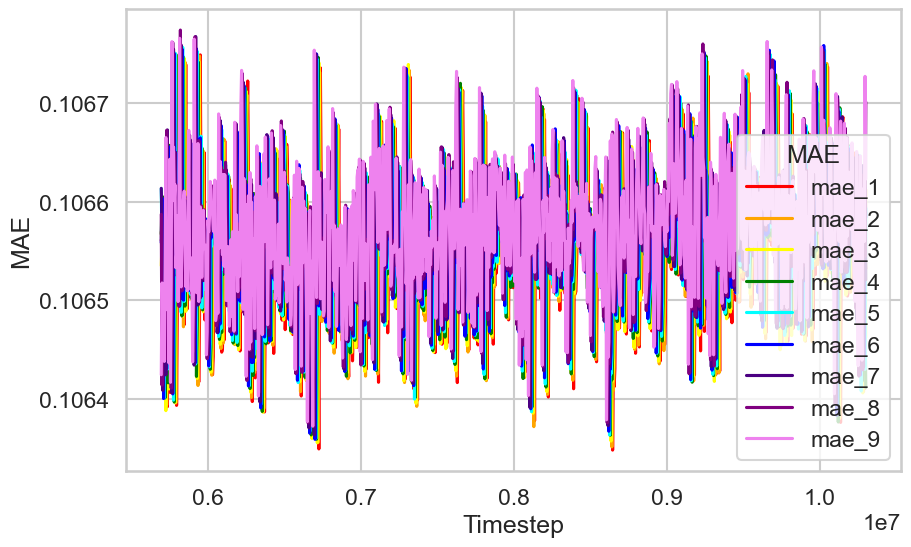

In [32]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'mae_{i + 1}', label=f'mae_{i + 1}', color=ls[i])

plt.ylabel('MAE')
plt.xlabel('Timestep')
# Show the plot
plt.legend(title='MAE')
plt.show()

Text(0, 0.5, 'Average MAE')

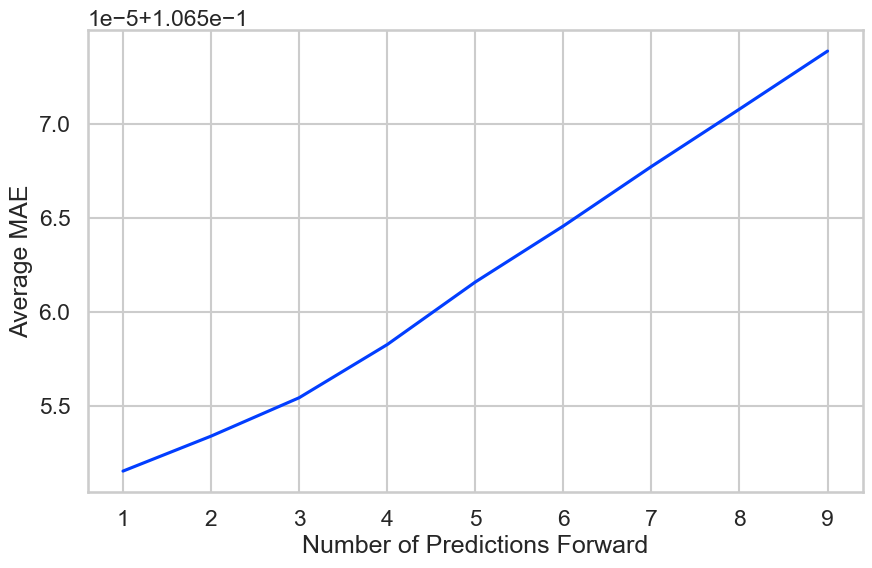

In [21]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('mae_')])

sns.lineplot(x=x, y=y)

plt.xlabel('Number of Predictions Forward')
plt.ylabel('Average MAE')

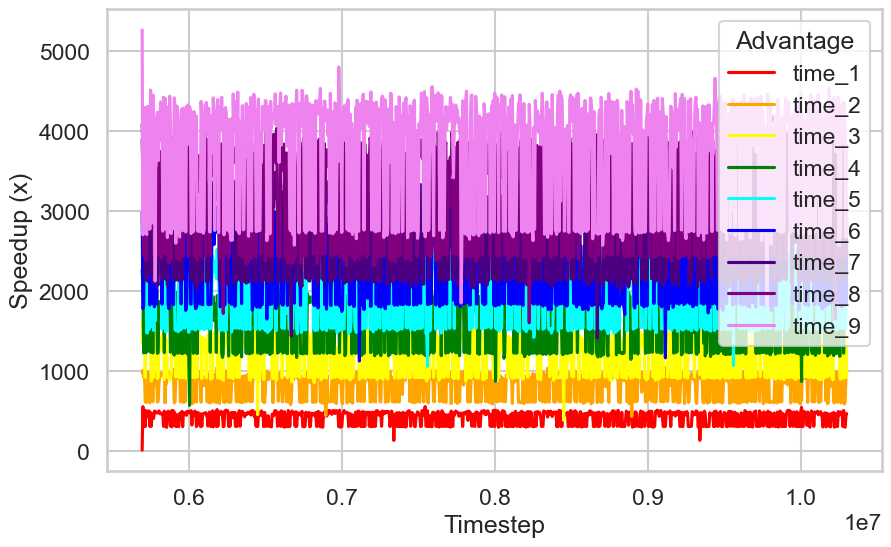

In [25]:
prev_steps_per_ms = 0.0787037037037
prev_time_5000 = 5000 / prev_steps_per_ms


sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))


# Plot each rmse_n
for i in range(len(ls)):
    df[f'time_{i + 1}'] = prev_time_5000 * (i + 1) / df[f'time_{i + 1}']
    sns.lineplot(data=df, x='timestep', y=f'time_{i + 1}', label=f'time_{i + 1}', color=ls[i])

plt.ylabel('Speedup (x)')
plt.xlabel('Timestep')
# Show the plot
plt.legend(title='Advantage')
plt.show()

df = pd.read_csv(j('results/256/performance.csv'))

Text(0, 0.5, 'Average Speedup Factor')

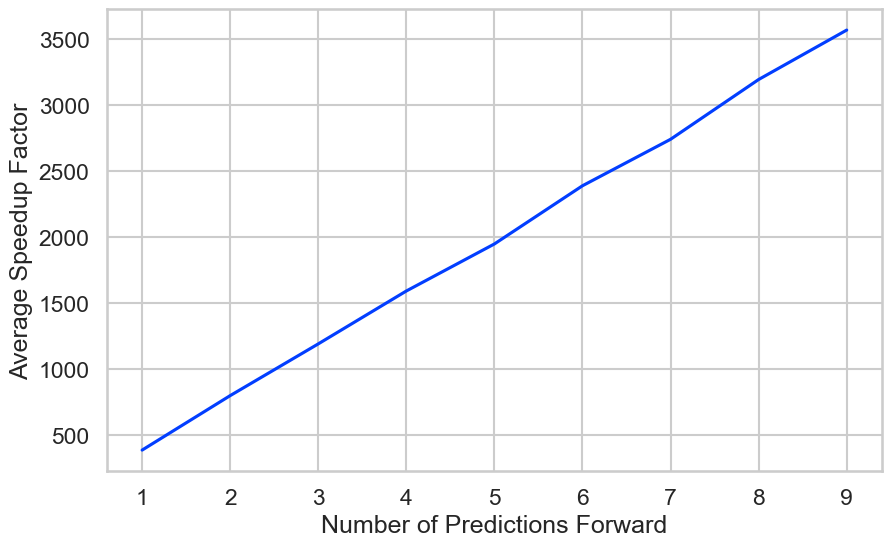

In [26]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([prev_time_5000 * i / np.mean(np.array(df[f'time_{i}'])) for i in x])

sns.lineplot(x=x, y=y)

plt.xlabel('Number of Predictions Forward')
plt.ylabel('Average Speedup Factor')